<a href="https://colab.research.google.com/github/kaispace30098/miniTimeSeries/blob/main/Arizona_Temperature_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


df0=pd.read_csv('/content/temp prediction.csv')

In [2]:
df0.columns

Index(['year', 'day', 'temp'], dtype='object')

In [3]:
df0.iloc[-1]

year    2022.0
day      166.0
temp      40.9
Name: 1261, dtype: float64

In [4]:
#convert to machine learning data frame for multi-output forecast
days=len(df0)
Tx=365
Ty=3
X=[]
Y=[]
for i in range(0,days-Tx-Ty+1):
    tx=df0['temp'].iloc[i:i+Tx].tolist()
    X.append(tx) 
    ty=df0['temp'].iloc[i+Tx:i+Tx+Ty].tolist() 
    Y.append(ty)
X=np.array(X)
X=X.reshape((X.shape[0],X.shape[1],1))
Y=np.array(Y)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,LSTM,Dense,GlobalAveragePooling1D

In [6]:
i=Input(shape=(Tx,1))
x=LSTM(32,return_sequences=True,activation='tanh')(i)
x=GlobalAveragePooling1D()(x)
x=Dense(Ty)(x)

model=Model(inputs=i,outputs=x)

In [7]:
xtrain=X[:-1]
xtest=X[-1:]
ytrain=Y[:-1]
ytest=Y[-1:]


In [8]:
model.compile(loss='mae', optimizer='adam')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('my_trained_model.h5',
                                                    save_best_only=True,
                                                    monitor='val_loss',
                                                    verbose=1)
callbacklist=[early_stopping,model_checkpoint]

In [9]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=300,callbacks=callbacklist)

Epoch 1/300
27/28 [===========================>..] - ETA: 0s - loss: 30.6992
Epoch 1: val_loss improved from inf to 40.26819, saving model to my_trained_model.h5
28/28 [==============================] - 8s 71ms/step - loss: 30.6582 - val_loss: 40.2682
Epoch 2/300
28/28 [==============================] - ETA: 0s - loss: 29.4868
Epoch 2: val_loss improved from 40.26819 to 38.70186, saving model to my_trained_model.h5
28/28 [==============================] - 1s 25ms/step - loss: 29.4868 - val_loss: 38.7019
Epoch 3/300
28/28 [==============================] - ETA: 0s - loss: 27.5654
Epoch 3: val_loss improved from 38.70186 to 36.65860, saving model to my_trained_model.h5
28/28 [==============================] - 1s 23ms/step - loss: 27.5654 - val_loss: 36.6586
Epoch 4/300
28/28 [==============================] - ETA: 0s - loss: 25.8027
Epoch 4: val_loss improved from 36.65860 to 35.19606, saving model to my_trained_model.h5
28/28 [==============================] - 1s 23ms/step - loss: 25.80

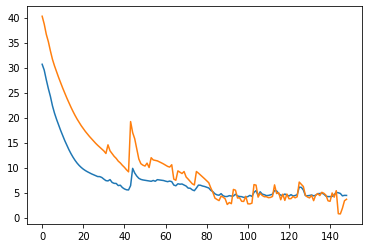

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [11]:
###PREDICTION iNPUT
input=xtest[0][Ty:]
a=input.reshape(input.shape[0]).tolist()
for i in Y[-1].tolist():
  a.append(i)

input=np.reshape(np.array(a),(1,np.array(a).shape[0],1))

In [18]:
from tensorflow.keras.models import load_model
loadmodel=load_model("/content/my_trained_model.h5")
prediction=loadmodel.predict(input)
prediction

array([[40.18931 , 40.149395, 40.407494]], dtype=float32)

In [13]:
from tensorflow.keras.layers import Bidirectional
i=Input(shape=(Tx,1))
x=Bidirectional(LSTM(32,return_sequences=True,activation='tanh'))(i)
x=GlobalAveragePooling1D()(x)
x=Dense(Ty)(x)

model2=Model(inputs=i,outputs=x)

In [14]:
model2.compile(loss='mae', optimizer='adam')
history=model2.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=300)

Epoch 1/300
28/28 [==============================] - 4s 53ms/step - loss: 30.6933 - val_loss: 40.0632
Epoch 2/300
28/28 [==============================] - 1s 22ms/step - loss: 29.0779 - val_loss: 38.1014
Epoch 3/300
28/28 [==============================] - 1s 22ms/step - loss: 26.5508 - val_loss: 35.0314
Epoch 4/300
28/28 [==============================] - 1s 22ms/step - loss: 23.3221 - val_loss: 31.8323
Epoch 5/300
28/28 [==============================] - 1s 22ms/step - loss: 20.2340 - val_loss: 28.8301
Epoch 6/300
28/28 [==============================] - 1s 22ms/step - loss: 17.4268 - val_loss: 26.0592
Epoch 7/300
28/28 [==============================] - 1s 22ms/step - loss: 14.6037 - val_loss: 23.1093
Epoch 8/300
28/28 [==============================] - 1s 22ms/step - loss: 12.2252 - val_loss: 20.7243
Epoch 9/300
28/28 [==============================] - 1s 22ms/step - loss: 10.6731 - val_loss: 18.9281
Epoch 10/300
28/28 [==============================] - 1s 22ms/step - loss: 9.7229 

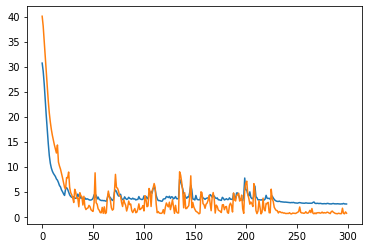

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
model2.predict(input)

array([[40.492397, 40.431522, 40.43411 ]], dtype=float32)